# Kickstarter Projects Analysis
- - - 
### Author: [Ronald Gachoka](https://github.com/rongachoka)

## 1. Business Understanding

This project aims to analyze the relationship between backer engagement and project success. <br>
Investigate factors such as the number of backers, average pledge amounts and determine if there is any correlation between high backer engagement and project success.


## 2. Data Understanding

This phase is broken down into the following steps:
> - Data collection
> - Describing the data
> - Data exploration
> - Verify data quality

The data was collected from the Kickstarter Projects at https://www.mavenanalytics.io/data-playground 

#### Load Libraries

In [1]:
## Data

import numpy as np
import pandas as pd

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## Statistics
import scipy.stats as stats


## styling
plt.style.use("ggplot")

#### Data Collection

In [2]:
## Kickstarter_projects is loaded and stored in kickstarter_df

kickstarter_df = pd.read_csv("data/kickstarter_projects.csv")
kickstarter_details = pd.read_csv("data/kickstarter_projects_data_dictionary.csv")

## Shape of the dataframe

print("Shape of the dataframe: ", kickstarter_df.shape)
print("Shape of the dataframe: ", kickstarter_details.shape)
kickstarter_df.head()


Shape of the dataframe:  (374853, 11)
Shape of the dataframe:  (11, 2)


,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [3]:
kickstarter_details

,Field,Description
0,ID,Internal kickstarter id
1,Name,Name of the project
2,Category,Project category
3,Subcategory,Project subcategory
4,Country,Country the project is from
5,Launched,Date the project was launched
6,Deadline,Deadline date for crowdfunding
7,Goal,Amount of money the creator needs to complete ...
8,Pledged,Amount of money pledged by the crowd (USD)
9,Backers,Number of backers


The kickstarter_df has 374,853 rows and 11 columns <br>
The kickstarter_details has 11 rows and 2 columns

The kickstarter_details will be used along the kickstart_df to provide additional details to what each of the column means.

**Categorical columns (8)** <br>

- ID - Internal kickstarter id <br>
- Name - Name of the project <br>
- Category - Kickstarter project category <br>
- Subcategory - Kickstarter project subcategory <br>
- Country - Country the project is from <br>
- Launched - Date the project was launched <br>
- Deadline - Deadline date for crowdfunding <br>
- State - Current condition the project is in (as of 2018-01-02)

**Numerical columns (3)** <br>

- Goal - Amount of money the creator needs to complete the project (USD) <br>
- Pledged - Amount of money pledged by the crowd (USD) <br>
- Backers - Number of backers <br>

In [4]:
## Data Description

kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


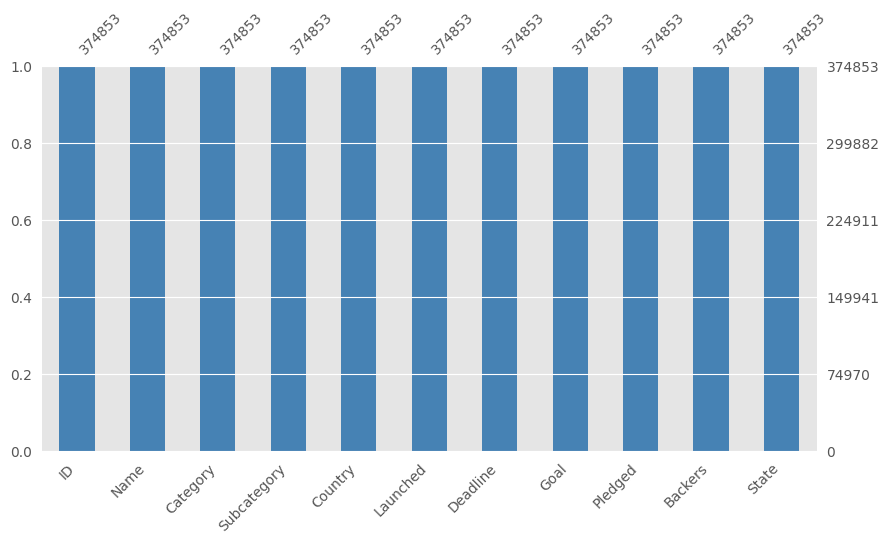

In [5]:
## Visualizing the missing values

msno.bar(kickstarter_df,color="steelblue", figsize = (10, 5), fontsize = 10);

- Initial overview of the data looks good as there are no missing values in any of the columns

### Data pre-processing

This part of the project will add in new columns needed for analysis as well as modify datatypes


In [6]:
## Changing data types

kickstarter_df["Deadline"] = pd.to_datetime(kickstarter_df["Deadline"])
kickstarter_df["Launched"] = pd.to_datetime(kickstarter_df["Launched"])
kickstarter_df["ID"] = kickstarter_df["ID"].astype("object")

## Creating new columns

kickstarter_df["Project_Duration"] = (kickstarter_df["Deadline"] - kickstarter_df["Launched"]).dt.days

kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                374853 non-null  object        
 1   Name              374853 non-null  object        
 2   Category          374853 non-null  object        
 3   Subcategory       374853 non-null  object        
 4   Country           374853 non-null  object        
 5   Launched          374853 non-null  datetime64[ns]
 6   Deadline          374853 non-null  datetime64[ns]
 7   Goal              374853 non-null  int64         
 8   Pledged           374853 non-null  int64         
 9   Backers           374853 non-null  int64         
 10  State             374853 non-null  object        
 11  Project_Duration  374853 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 34.3+ MB


### Column analysis

This section will explore each column to see their distributions as well any additional insights that can be drawn

**2.1 ID**

> - Unique Kickstarter project ID

In [7]:
## Checking for duplicates

kickstarter_df["ID"].duplicated().sum()

0

There are no duplicated ID's in this dataset 

**2.2 Name**
> - Kickstarter project name

In [8]:
## Checking for duplicates

kickstarter_df["Name"].duplicated().sum()

duplicate_names = kickstarter_df["Name"].value_counts()
duplicate_names = duplicate_names[duplicate_names > 1]

print(duplicate_names[:10])

Name
New EP/Music Development      13
Canceled (Canceled)           13
N/A (Canceled)                11
Music Video                   11
Cancelled (Canceled)          10
New EP / Music Development    10
The Journey                    9
Reflections                    9
Debut Album                    9
A Midsummer Night's Dream      8
Name: count, dtype: int64


**2.3 Category**

> - Kickstarter project category

In [9]:
## Number of categories

print("Number of categories: ", kickstarter_df["Category"].nunique())

## Propotion of categories

kickstarter_df["Category"].value_counts(normalize = True) * 100


Number of categories:  15


Category
Film & Video    16.724956
Music           13.212913
Publishing      10.504918
Games            9.397017
Technology       8.686605
Design           8.020477
Art              7.509877
Food             6.562306
Fashion          6.085586
Theater          2.910741
Comics           2.886198
Photography      2.875260
Crafts           2.349988
Journalism       1.268230
Dance            1.004927
Name: proportion, dtype: float64

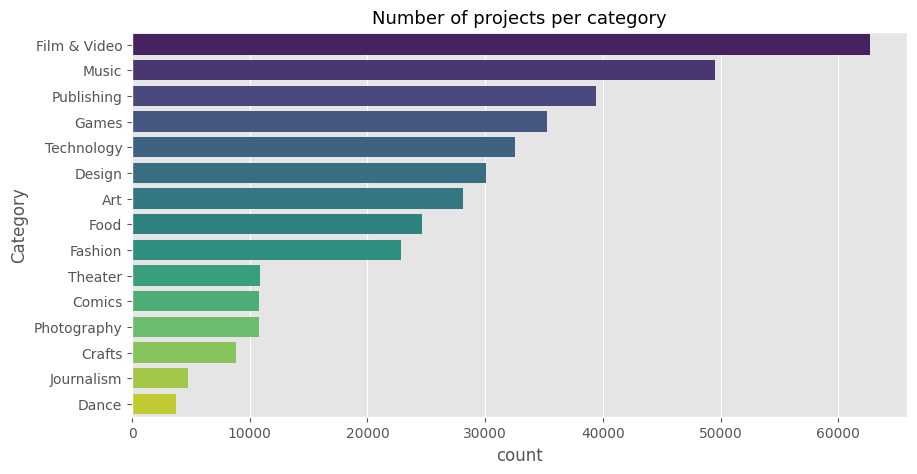

In [10]:
## Visualizing the categories

plt.figure(figsize = (10, 5))
sns.countplot(y = kickstarter_df["Category"], 
              order = kickstarter_df["Category"].value_counts().index, 
              palette = "viridis");
plt.title("Number of projects per category", fontsize = 13);

The distribution above shows that most of the kickstarter projects are "Film & Video" which accounts for 16% of the projects followd by "Music" at 13%

**2.4 Sub-category**
> - Which subcategory the kickstarter project belongs to

Number of sub-categories:  159


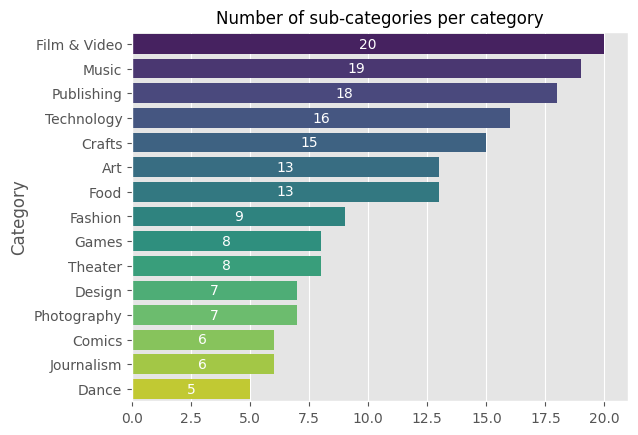

In [11]:
## Number of sub-categories 

print("Number of sub-categories: ", kickstarter_df["Subcategory"].nunique())

## Visualizing the number of sub-categories per category

ax = sns.barplot(y = kickstarter_df.groupby("Category")["Subcategory"].nunique().sort_values(ascending = False).index,
            x = kickstarter_df.groupby("Category")["Subcategory"].nunique().sort_values(ascending = False).values,
            palette = "viridis");
ax.bar_label(ax.containers[0], fmt = '%.0f', label_type = 'center', color="white");
plt.title("Number of sub-categories per category", fontsize = 12);



As seen on the distribution above, there are 159 subcategories in the dataset, and most kickstarter projects are either in Film & Video, Music and Publishing.
One can infer that the more kickstarter projects there are in a sector/category, the more subcategories you can find. This can be seen when you look at the total number of subcategories in each sector/category and the total number of kickstarter projects in each of those categories.

#### 2.5 Country

> - Country where the project is launched.

Number of countries:  22


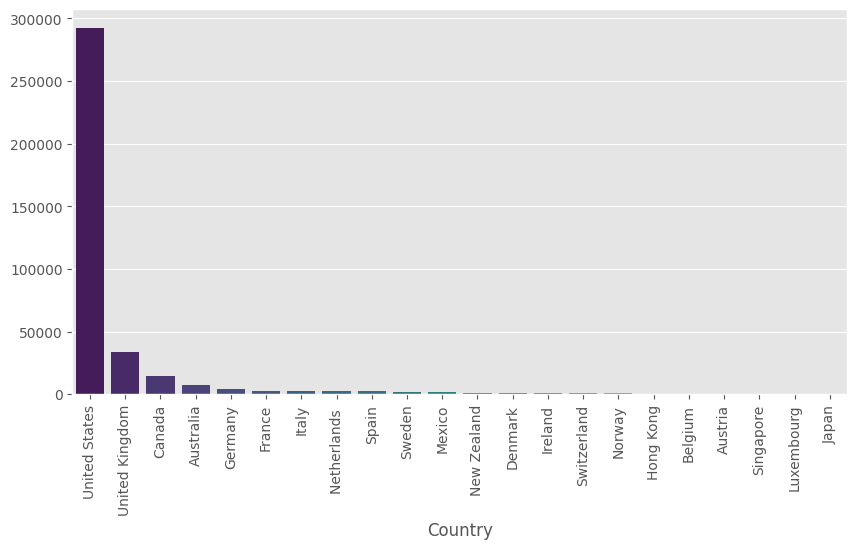

In [12]:
## Number of countries

print("Number of countries: ", kickstarter_df["Country"].nunique())

## Visualizing the number of projects per country

plt.figure(figsize = (10, 5))
sns.barplot(x = kickstarter_df["Country"].value_counts().index,
            y = kickstarter_df["Country"].value_counts().values,
            palette = "viridis");
plt.xticks(rotation = 90);


In [13]:
## Propotion of projects per country

kickstarter_df["Country"].value_counts(normalize = True) * 100


Country
United States     78.062067
United Kingdom     8.982454
Canada             3.936476
Australia          2.091220
Germany            1.112703
France             0.784041
Italy              0.767768
Netherlands        0.765100
Spain              0.607171
Sweden             0.468717
Mexico             0.467383
New Zealand        0.386018
Denmark            0.296916
Ireland            0.216351
Switzerland        0.202746
Norway             0.188874
Hong Kong          0.164865
Belgium            0.164598
Austria            0.159262
Singapore          0.148058
Luxembourg         0.016540
Japan              0.010671
Name: proportion, dtype: float64

As seen on the graph and chart above, nearly 80% of the kickstarter projects started are in the United Stated, then followed by United Kingdom at 8%.
It would be interesting to analyze what factors make it favorable to start a project in the United States compared to the other countries but that is outside the scope of this project.

#### 2.6 Launched

Date kickstarter projects are launched

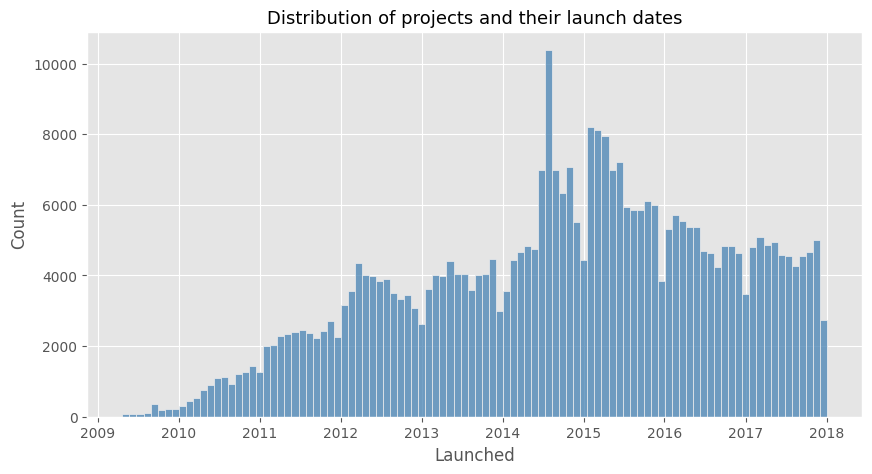

In [14]:
## Visualizing distribution of projects and their launch dates

plt.figure(figsize = (10, 5))
sns.histplot(kickstarter_df["Launched"], bins = 100, color = "steelblue");
plt.title("Distribution of projects and their launch dates", fontsize = 13);


As expected, the number of kickstarter projects has been on the rise since 2009 but what is suprising is the sharp rise of kickstarter projects in 2014 and 2015 but gradually settled down.

#### 2.7 Goal

> - Goal amount needed to complete the project

In [15]:
## Goal statistics
print("Figures in '000s")
kickstarter_df["Goal"].describe()/1000


## Which projects have the highest goal?

kickstarter_df.sort_values(by = "Goal", ascending = False)[:5]

## Dropping the project with the highest goal

kickstarter_df.drop(kickstarter_df[kickstarter_df["Goal"] == 166361391].index, inplace = True)



Figures in '000s


#### 2.8 Pledged

> - Amound pledged by backers of the kickstarter project

In [16]:
## Pledged statistics

kickstarter_df["Pledged"].describe()/100

stats.skew(kickstarter_df["Pledged"], bias = False)

82.00381679464157

In [17]:
## Which projects have the highest pledged amount?

kickstarter_df.sort_values(by = "Pledged", ascending = False)[:5]

## Average pledged amount per project

kickstarter_df["Pledged"].mean()/100

91.2109705163638

Looking at the pledged statistics above we see that the data is heavily skewed to the right with a figure of 81.96. This can be attributed to the wide range of pledged amounts with the maximum being 203k while the 50% percentile is 600. <br>
The average pledge amount per project is $9,145.36

## 3. Data Preparation

This will include the following steps:
> - Selecting data
> - Data Cleaning
> - Data Construction
> - Data Integration

### Selecting Data

What are the appropriate columns to use for our analysis

In [18]:
## Dropping columns

kickstarter_df.drop(["ID", "Launched","Deadline"], axis = 1, inplace = True)

## Overview of our data

kickstarter_df.head()


,Name,Category,Subcategory,Country,Goal,Pledged,Backers,State,Project_Duration
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,1000,625,30,Failed,39
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,80000,22,3,Failed,87
2,drawing for dollars,Art,Illustration,United States,20,35,3,Successful,8
3,Offline Wikipedia iPhone app,Technology,Software,United States,99,145,25,Successful,79
4,Pantshirts,Fashion,Fashion,United States,1900,387,10,Failed,28


### Data Cleaning

This section will look at duplicate values and determine the appropriate methods to deal with them.



**Duplicated Records**

In [25]:
## Unique values in the name column

print("Number of unique names: ", kickstarter_df["Name"].nunique())
print("Number of duplicate names: ", len(duplicate_names))

## Proportion of duplicate names

len(duplicate_names)/kickstarter_df.shape[0] * 100


Number of unique names:  372060
Number of duplicate names:  2188


0.5836970324287986

In [21]:

duplicate_names = kickstarter_df["Name"].value_counts()
duplicate_names = duplicate_names[duplicate_names > 1]

print(duplicate_names[:10])

Name
New EP/Music Development      13
Canceled (Canceled)           13
N/A (Canceled)                11
Music Video                   11
Cancelled (Canceled)          10
New EP / Music Development    10
The Journey                    9
Debut Album                    9
Reflections                    9
The Other Side                 8
Name: count, dtype: int64


In [24]:
## Analyzing some of the duplicate names

kickstarter_df[kickstarter_df["Name"] == "New EP/Music Development"][:5]

kickstarter_df[kickstarter_df["Name"] == "The Journey"][:5]

,Name,Category,Subcategory,Country,Goal,Pledged,Backers,State,Project_Duration
90343,The Journey,Film & Video,Documentary,United Kingdom,124609,67511,219,Failed,59
132254,The Journey,Film & Video,Documentary,United States,15000,181,9,Failed,20
147668,The Journey,Journalism,Photo,United States,12500,5,1,Failed,29
158562,The Journey,Art,Installations,United Kingdom,1001,67,3,Failed,16
196743,The Journey,Film & Video,Television,United States,22000,40357,253,Successful,29


The duplicated names may cause some confusion but it seems like they are either part of a larger project as seen in "New EP/Music Development". Similary when looking at the second case involving "The Journey", it follows a similar case where it looks like it may be a similar project just subsets of it with different timelines. 

It would make sense to drop the duplicate names as they make up a small proportion of the dataset, however some of the mini-projects that share the same name were in different countries and some were a success. Therefore, the analysis will continue without dropping any duplicates

## 4. Modelling

We will use mainly summary statistics to analyze the relationship between backer engagement and success of a project

In [28]:
## Success rate

kickstarter_df["State"].value_counts()

State
Failed        197610
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [34]:
## Calculating success rate

success_rate = kickstarter_df[(kickstarter_df["State"] == "Successful") | (kickstarter_df["State"] == "Live")]["State"].count() / kickstarter_df["State"].count() * 100

print(f"Success rate: {round(success_rate, 2)}%")


Success rate: 36.45%


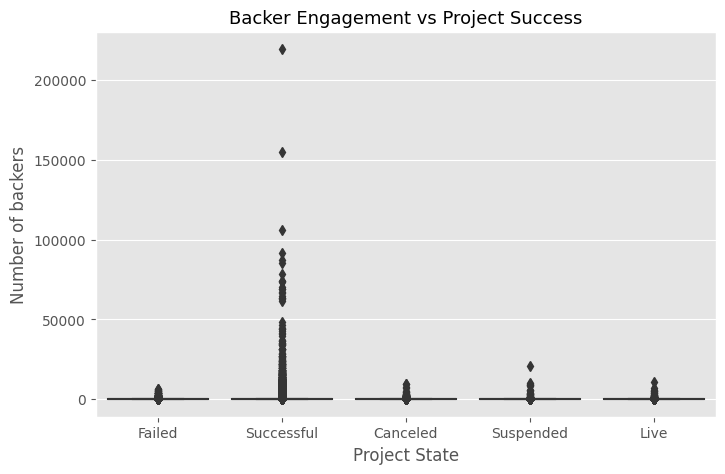

In [39]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = kickstarter_df["State"], y = kickstarter_df["Backers"], palette = "viridis");
plt.xlabel("Project State", fontsize = 12);
plt.ylabel("Number of backers", fontsize = 12);
plt.title("Backer Engagement vs Project Success", fontsize = 13);

### Correlation between Backer engagement and Project Success



In [49]:
## Correlation



<class 'pandas.core.series.Series'>
Index: 374852 entries, 0 to 374852
Series name: Backers
Non-Null Count   Dtype
--------------   -----
374852 non-null  int64
dtypes: int64(1)
memory usage: 5.7 MB
